In [15]:
import matplotlib as mp
import seaborn as sn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [16]:
data=pd.read_csv("train.csv")

In [17]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [18]:
data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [19]:
true_slope = 10.889
true_intercept = 3.456
input_var = np.arange(0.0,100.0)
output_var = true_slope * input_var + true_intercept + 500.0 * np.random.rand(len(input_var))



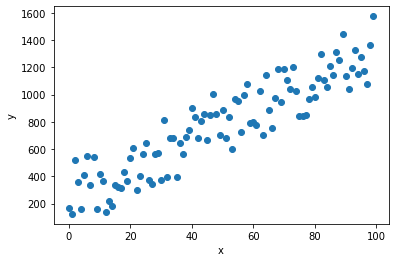

In [20]:
plt.figure()
plt.scatter(input_var, output_var)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [21]:
X=data[['LotFrontage']].values
Y=data[['LotArea']].values

In [22]:
print(X.shape,Y.shape)

(1460, 1) (1460, 1)


In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

In [24]:
print(x_train.shape,y_train.shape)

(1022, 1) (1022, 1)


In [25]:
class SLR:
    def __init__(self,learning_rate=0.001,iterations=1000):
        self.learning_rate=learning_rate
        self.iterations=iterations
        self.slope=None
        self.intercept=None
        
    def fit(self,X,Y):
        n=X.shape[0]
        self.slope=np.zeros((X.shape[1],1))
        self.intercept=0
        
        for i in range(self.iterations):
            y_hat=np.dot(X,self.slope)+self.intercept
            dw=(1/n)*np.dot(X.T,(y_hat - Y))
            db=(1/n)*np.sum(y_hat - Y)
            #update parameters
            self.slope-=self.learning_rate*dw
            self.intercept-=self.learning_rate*db
            
    def predict(self,X):
        y_hat=np.dot(X,self.slope)+self.intercept
        return y_hat
    

In [26]:
reg=SLR(learning_rate=0.03)
reg.fit(x_train,y_train)

In [27]:
y_pred=reg.predict(x_test)

In [28]:
def MSE(y_act,y_hat):
    return np.mean((y_act-y_hat)**2)
MSE(y_pred,y_test)

nan